In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'
wcolors = ['orange', 'red', 'purple']
myindex = [
    '7:00', '7:30', '8:00', '8:30',
    '9:00', '9:30', '10:00', '10:30',
    '11:00', '11:30', '12:00', '12:30',
    '13:00', '13:30', '14:00', '14:30',
    '15:00', '15:30', '16:00', '16:30',
    '17:00', '17:30', '18:00', '18:30',
    '19:00', '19:30', '20:00', '20:30',
    '21:00', '21:30', '22:00', '22:30',
    '23:00', '23:30']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    minuti = [0, 30]
    vmedia_giorno_ore = []
    for ora in ore:
        for minuto in minuti:
            tragitti_fascia_oraria = df[(df['Hour'] == ora) & (df['Minute'] >= minuto) & (df['Minute'] <= (minuto + 30))]
            velocita_media_oraria = (tragitti_fascia_oraria[distance_param] * 60.) / tragitti_fascia_oraria[mezzo]
            vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore
    
def vmedia_week(df, mezzo):
    short_paths = df[distance_param].between(2.0, 4.0)
    medium_paths = df[distance_param].between(4.0, 6.0)
    long_paths = df[distance_param].between(6.0, 10.0)
    
    lst = [
        vmedia_giorno(df[short_paths], mezzo),
        vmedia_giorno(df[medium_paths], mezzo),
        vmedia_giorno(df[long_paths], mezzo)]
    
    array = np.array(lst).T
    
    return pd.DataFrame(array, index=myindex, columns=['[2, 4) km', '[4, 6) km', '[6, 10) km']).round(2)

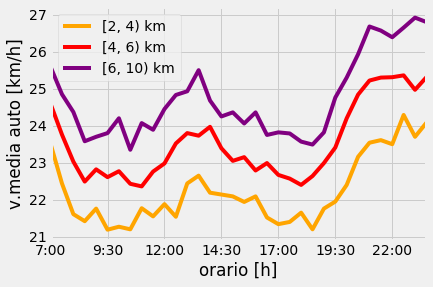

In [3]:
tragitti = tragitti[clean(tragitti)]
vmedia_week(tragitti, 'Car').plot(color=wcolors)
plt.xlabel('orario [h]')
plt.ylabel('v.media auto [km/h]')
plt.show()

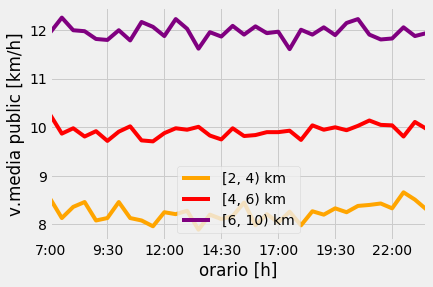

In [4]:
vmedia_week(tragitti, 'Public').plot(color=wcolors)
plt.xlabel('orario [h]')
plt.ylabel('v.media public [km/h]')
plt.show()

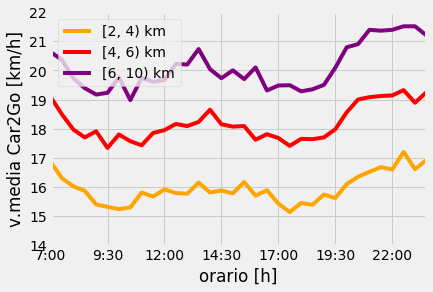

In [5]:
vmedia_week(tragitti, 'Car2Go').plot(color=wcolors)
plt.ylim(14, 22)
plt.xlabel('orario [h]')
plt.ylabel('v.media Car2Go [km/h]')
plt.show()

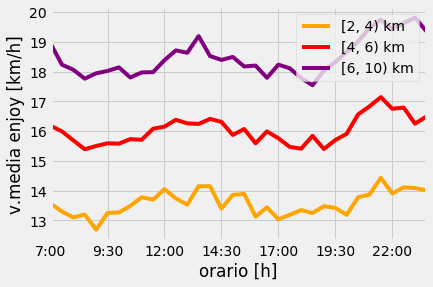

In [6]:
vmedia_week(tragitti, 'Enjoy').plot(color=wcolors)
plt.xlabel('orario [h]')
plt.ylabel('v.media enjoy [km/h]')
plt.show()